In [1]:
#CSE 6363 - Machine Learning
#Team 13 - Project Submission 2

    #Shruthi Sree Thirunavukkarasu (1001933428)
    #Dinesh Kumar KodithiPalli Lava Kumar (1001949238)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

#Reading input file with dataset
rawData=pd.read_json(r"/content/drive/MyDrive/Colab Notebooks/AMAZON_FASHION.json.gz",lines=True,orient='columns')
rawData.head()

Mounted at /content/drive


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN


In [4]:
#Removing duplicate reviews
print("The shape of the data set before removing duplicate reviews : {}".format(rawData.shape))
rawData=rawData.drop_duplicates(subset=["reviewText"], keep='first', inplace=False)
print("The shape of the data set after removing duplicate reviews : {}".format(rawData.shape))

The shape of the data set before removing duplicate reviews : (883636, 12)
The shape of the data set after removing duplicate reviews : (768795, 12)


In [5]:
#Extracting required columns from the dataset
reviewData = rawData[["reviewerID","reviewText","overall","asin"]]
#reviewData = reviewData.sample(n=80000)
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768795 entries, 0 to 883635
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   reviewerID  768795 non-null  object
 1   reviewText  768794 non-null  object
 2   overall     768795 non-null  int64 
 3   asin        768795 non-null  object
dtypes: int64(1), object(3)
memory usage: 29.3+ MB


In [6]:
#Removing null entries from the dataset
uniqueData = reviewData.dropna()
uniqueData.info()
uniqueData.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768794 entries, 0 to 883635
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   reviewerID  768794 non-null  object
 1   reviewText  768794 non-null  object
 2   overall     768794 non-null  int64 
 3   asin        768794 non-null  object
dtypes: int64(1), object(3)
memory usage: 29.3+ MB


,reviewerID,reviewText,overall,asin
0,A1D4G1SNUZWQOT,Exactly what I needed.,5,7106116521
1,A3DDWDH9PX2YX2,"I agree with the other review, the opening is ...",2,7106116521
2,A2MWC41EW7XL15,Love these... I am going to order another pack...,4,7106116521
3,A2UH2QQ275NV45,too tiny an opening,2,7106116521
4,A89F3LQADZBS5,Okay,3,7106116521


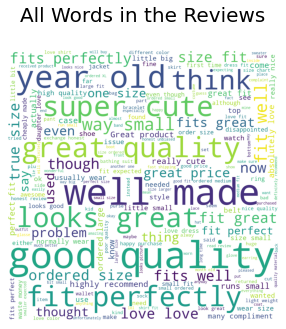

In [7]:
#Generating Wordcloud for the reviews
reviewTextData = uniqueData['reviewText']
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=1000
                     ).generate(" ".join(reviewTextData))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=20)
plt.axis('off')
plt.show()

In [8]:
#Joining all review texts into a single text line separated by space
reviewTextData = " ".join(uniqueData['reviewText'])

#Creating list of sentiment words to compare and measure frequency
words = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']


#Counting frequency of sentiment words in review text
wordFrequency = {}
for word in reviewTextData.split(" "):
    if word in words:
        wordFrequency[word] = wordFrequency.get(word,0)+1

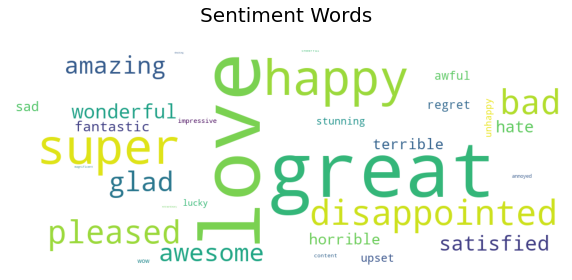

In [9]:
#Generating wordcloud of the most frequent sentiment words
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate_from_frequencies(wordFrequency)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Sentiment Words\n',size=20)
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


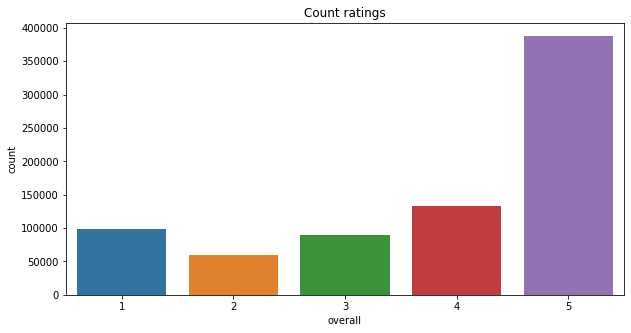

In [10]:
#Plotting and counting the distribution of reviews based on ratings between 1-5
plt.figure(figsize=(10,5))
sns.countplot(uniqueData['overall'])
plt.title('Count ratings')
plt.show()

In [11]:
#Removing punctuations from the review texts
remPunct = re.compile("[.;:*~!\'?,\"()\\\[\]]") 
remPunctWSpc = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
uniqueData.reviewText = [remPunct.sub("", i.lower()) for i in uniqueData.reviewText] 
uniqueData.reviewText= [remPunctWSpc.sub(" ", i) for i in uniqueData.reviewText]
print(uniqueData)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


            reviewerID                                         reviewText  \
0       A1D4G1SNUZWQOT                              exactly what i needed   
1       A3DDWDH9PX2YX2  i agree with the other review the opening is t...   
2       A2MWC41EW7XL15  love these i am going to order another pack to...   
3       A2UH2QQ275NV45                                too tiny an opening   
4        A89F3LQADZBS5                                               okay   
...                ...                                                ...   
883631  A1ZSB2Q144UTEY  i absolutely love this dress  its sexy and com...   
883632  A2CCDV0J5VB6F2  im 56 175lbs im on the tall side i wear a larg...   
883633  A3O90PACS7B61K                          too big in the chest area   
883634  A2HO94I89U3LNH                 too clear in the back needs lining   
883635  A2RSX9E79DUHRX  ordered and was slightly small worked with the...   

        overall        asin  
0             5  7106116521  
1             2

In [12]:
#Removing stop words from the 
english_stopwords = stopwords.words('english')
print(english_stopwords,"\n")
def remove_stopwords(reviewCollection):
    removed_stopwords = []
    for reviews in reviewCollection:
        removed_stopwords.append(
            ' '.join([word for word in reviews.split() 
                      if word not in english_stopwords])
        )
    return removed_stopwords
without_stopwords = remove_stopwords(uniqueData.reviewText)

print(without_stopwords[:5])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
#Stemming the refined review texts
def get_stemmed_text(reviewCollection):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in reviews.split()]) for reviews in reviewCollection]

stemmed_reviews = get_stemmed_text(without_stopwords)

print(stemmed_reviews[:5])

['exactli need', 'agre review open small almost bent hook expens ear tri get higher end theyr seen would buy price send back', 'love go order anoth pack keep work someon includ alway lose back ear dont understand fish hook ear dont wish tini bit longer', 'tini open', 'okay']


In [14]:
#Lemmatizing the refined review texts
def get_lemmatized_text(reviewCollection):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in reviews.split()]) for reviews in reviewCollection]

lemmatized_reviews = get_lemmatized_text(without_stopwords)
print(lemmatized_reviews[:5])

['exactly needed', 'agree review opening small almost bent hook expensive earring trying get higher end theyre seen would buy price sending back', 'love going order another pack keep work someone including always losing back earring dont understand fish hook earring dont wish tiny bit longer', 'tiny opening', 'okay']


In [15]:
#Data Labelling steps
uniqueData['reviewText'] = lemmatized_reviews
conditions = [
    (uniqueData['overall'] >= 4),
    (uniqueData['overall'] == 3),
    (uniqueData['overall'] <= 2)
    ]
values = ['0', '1', '2']
uniqueData['sentiment'] = np.select(conditions, values)
uniqueData.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,reviewerID,reviewText,overall,asin,sentiment
0,A1D4G1SNUZWQOT,exactly needed,5,7106116521,0
1,A3DDWDH9PX2YX2,agree review opening small almost bent hook ex...,2,7106116521,2
2,A2MWC41EW7XL15,love going order another pack keep work someon...,4,7106116521,0
3,A2UH2QQ275NV45,tiny opening,2,7106116521,2
4,A89F3LQADZBS5,okay,3,7106116521,1


In [16]:
#Data Vectorization steps
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
corpus = ['exactly needed', 'agree review opening small almost bent hook expensive earring trying get higher end theyre seen would buy price sending back', 'love going order another pack keep work someone including always losing back earring dont understand fish hook earring dont wish tiny bit longer', 'tiny opening', 'okay']
vectors = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
print(f"feature names\n{feature_names}")
matrix = vectors.todense()
list_dense = matrix.tolist()
dataFrame= pd.DataFrame(list_dense, columns=feature_names)
print(dataFrame)

feature names
['agree', 'almost', 'always', 'another', 'back', 'bent', 'bit', 'buy', 'dont', 'earring', 'end', 'exactly', 'expensive', 'fish', 'get', 'going', 'higher', 'hook', 'including', 'keep', 'longer', 'losing', 'love', 'needed', 'okay', 'opening', 'order', 'pack', 'price', 'review', 'seen', 'sending', 'small', 'someone', 'theyre', 'tiny', 'trying', 'understand', 'wish', 'work', 'would']
      agree    almost    always   another      back      bent       bit  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.231847  0.231847  0.000000  0.000000  0.187052  0.231847  0.000000   
2  0.000000  0.000000  0.201798  0.201798  0.162810  0.000000  0.201798   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

        buy      dont   earring  ...   sending     small   someone    theyre  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.00

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
#Splitting data into test and train sets
x = uniqueData['reviewText'].values
y = uniqueData['sentiment'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify = y)

In [18]:
np.unique(y_train,return_counts=True)

(array(['0', '1', '2'], dtype=object), array([416207,  71508, 127320]))

In [19]:
np.unique(y_test,return_counts=True)

(array(['0', '1', '2'], dtype=object), array([104052,  17877,  31830]))

In [20]:
#LSTM
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers.embeddings import Embedding

In [21]:
top_words = 2000 
maxlen = 100 
batch_size = 32
nb_classes = 3
nb_epoch = 10

In [22]:
# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
tokenizer.fit_on_texts(x_train)

sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [23]:
tokenizer = Tokenizer(num_words=top_words, split=' ')
tokenizer.fit_on_texts(uniqueData['reviewText'].values)
X = tokenizer.texts_to_sequences(uniqueData['reviewText'].values)
X = pad_sequences(X)
X[:3]

array([[  0,   0,   0, ...,   0, 112, 229],
       [  0,   0,   0, ...,  26, 998,  48],
       [  0,   0,   0, ..., 415,  46, 265]], dtype=int32)

In [24]:
# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

In [25]:
print('X_train shape:', X_train_seq.shape)
print("========================================")
print('X_test shape:', X_test_seq.shape)
print("========================================")
print('y_train shape:', y_train_seq.shape)
print("========================================")
print('y_test shape:', y_test_seq.shape)
print("========================================")

X_train shape: (615035, 100)
X_test shape: (153759, 100)
y_train shape: (615035, 3)
y_test shape: (153759, 3)


In [26]:
embed_dim = 128
lstm_out = 196
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
model = Sequential()
model.add(Embedding(top_words, embed_dim,input_length = X_train_seq.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 3)                 591       
                                                                 
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_seq,y_train_seq, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(522779, 100) (522779, 3)
(92256, 100) (92256, 3)


In [28]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [29]:
batch_size = 128
history = model.fit(X_train, Y_train, epochs = 10, batch_size=128, verbose = 1,validation_split = 0.15)

Epoch 1/10
3472/3472 [==============================] - 1991s 572ms/step - loss: 0.4755 - accuracy: 0.8113 - val_loss: 0.4399 - val_accuracy: 0.8233
Epoch 2/10
3472/3472 [==============================] - 1960s 565ms/step - loss: 0.4391 - accuracy: 0.8242 - val_loss: 0.4274 - val_accuracy: 0.8282
Epoch 3/10
3472/3472 [==============================] - 1961s 565ms/step - loss: 0.4265 - accuracy: 0.8298 - val_loss: 0.4192 - val_accuracy: 0.8304
Epoch 4/10
3472/3472 [==============================] - 1960s 564ms/step - loss: 0.4173 - accuracy: 0.8329 - val_loss: 0.4149 - val_accuracy: 0.8318
Epoch 5/10
3472/3472 [==============================] - 1989s 573ms/step - loss: 0.4099 - accuracy: 0.8357 - val_loss: 0.4129 - val_accuracy: 0.8327
Epoch 6/10
3472/3472 [==============================] - 1950s 562ms/step - loss: 0.4033 - accuracy: 0.8381 - val_loss: 0.4141 - val_accuracy: 0.8331
Epoch 7/10
3472/3472 [==============================] - 1894s 545ms/step - loss: 0.3975 - accuracy: 0.8401

In [30]:
results = model.evaluate(X_test,Y_test, batch_size=batch_size)
print("validation loss, validation accuracy:",results)

721/721 [==============================] - 32s 45ms/step - loss: 0.4195 - accuracy: 0.8326
validation loss, validation accuracy: [0.41945716738700867, 0.8326287865638733]


In [ ]:
Y_pred = model.predict(X_test,batch_size = batch_size)
print(Y_pred.shape)

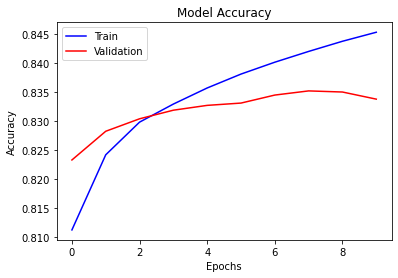

In [32]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.title('Model Accuracy'),
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

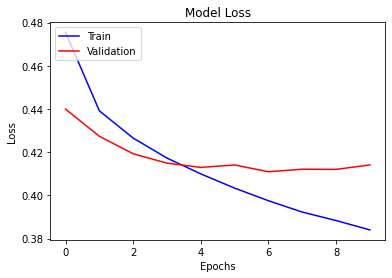

In [33]:
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.title('Model Loss'),
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()